<a href="https://colab.research.google.com/github/hhcchc7/bigdata/blob/master/1022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
install.packages("ggplot2")
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(SportsAnalytics)
library(ggplot2)

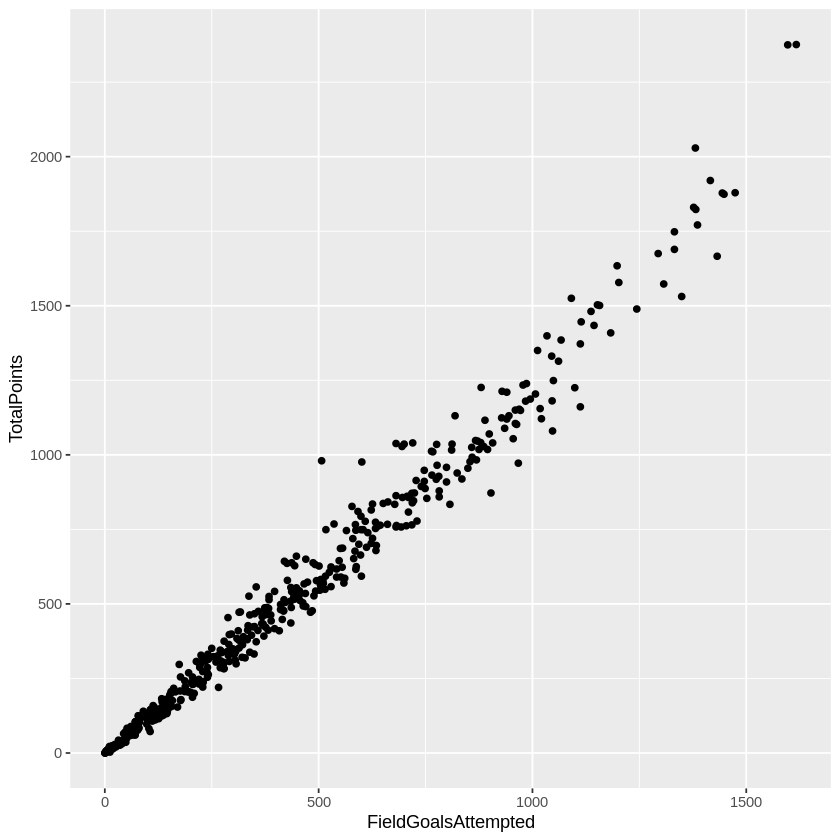

In [10]:
NBA1516<- fetch_NBAPlayerStatistics("15-16")
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



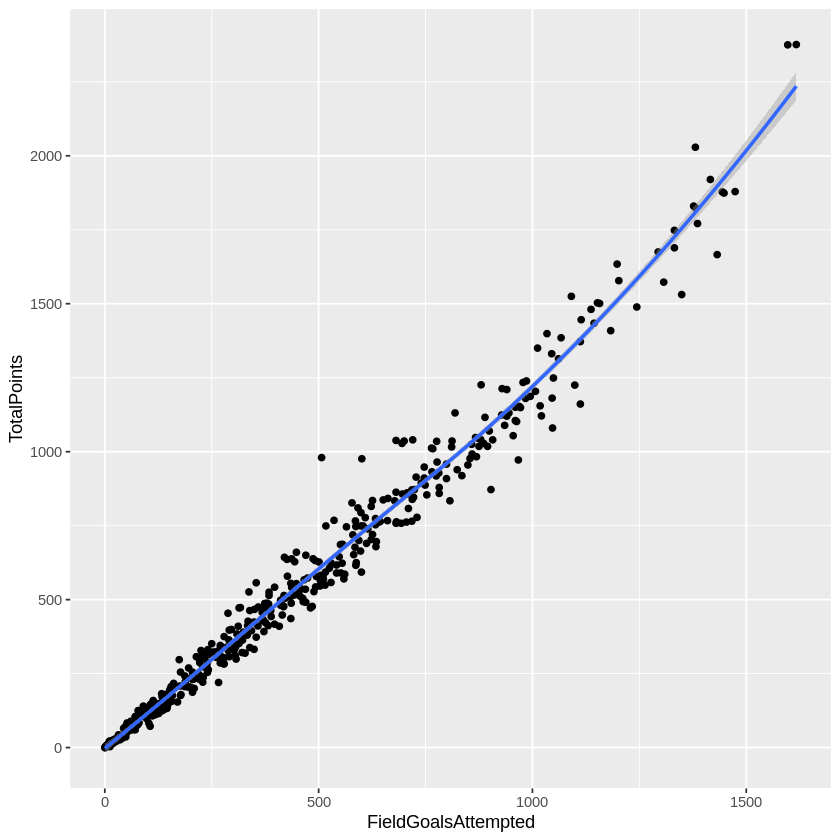

In [12]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516,
geom = c("point", "smooth"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



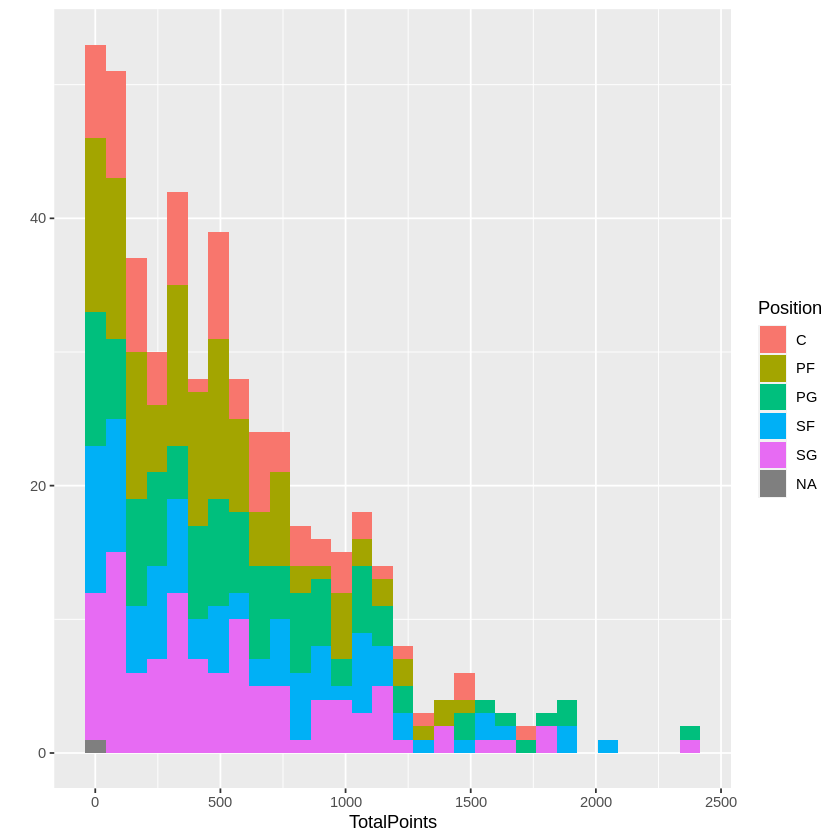

In [13]:
#畫TotalPoints的直方圖/ fill = Position 並用守備位置Position著色
qplot(TotalPoints, data = NBA1516, fill = Position)

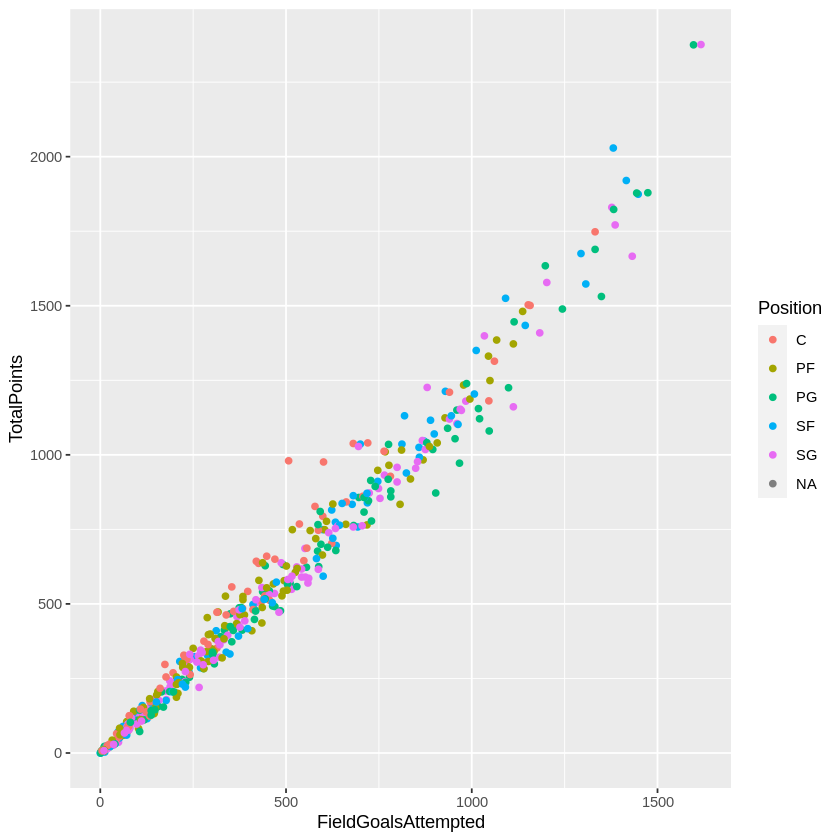

In [14]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516,color=Position)


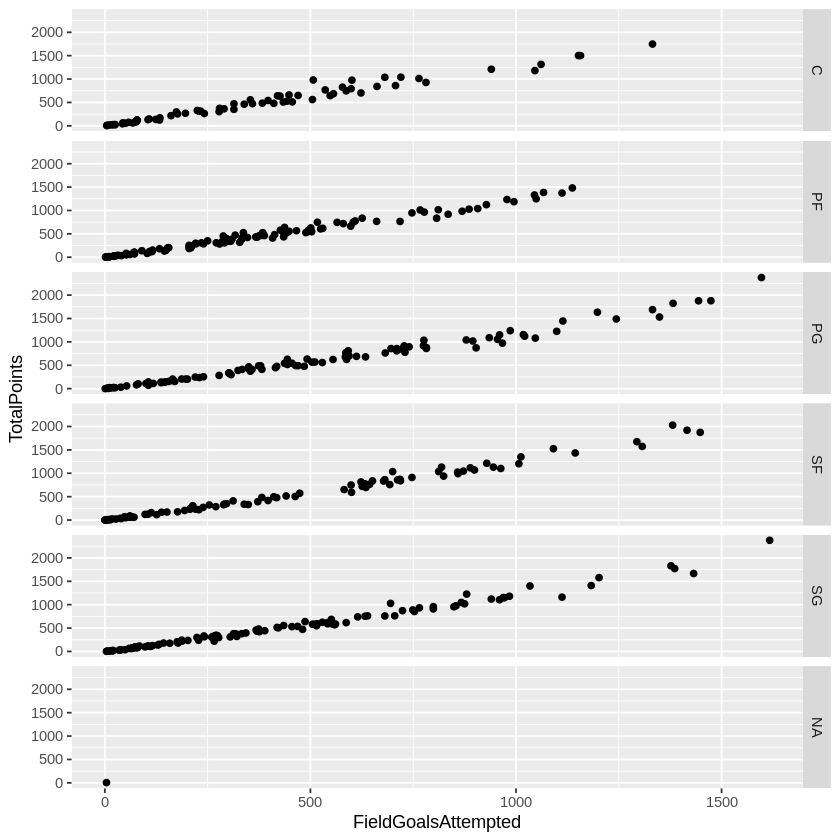

In [15]:
#facets = .~ Position 用守備位置Position分群畫圖(直向)
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, facets = Position ~ .)

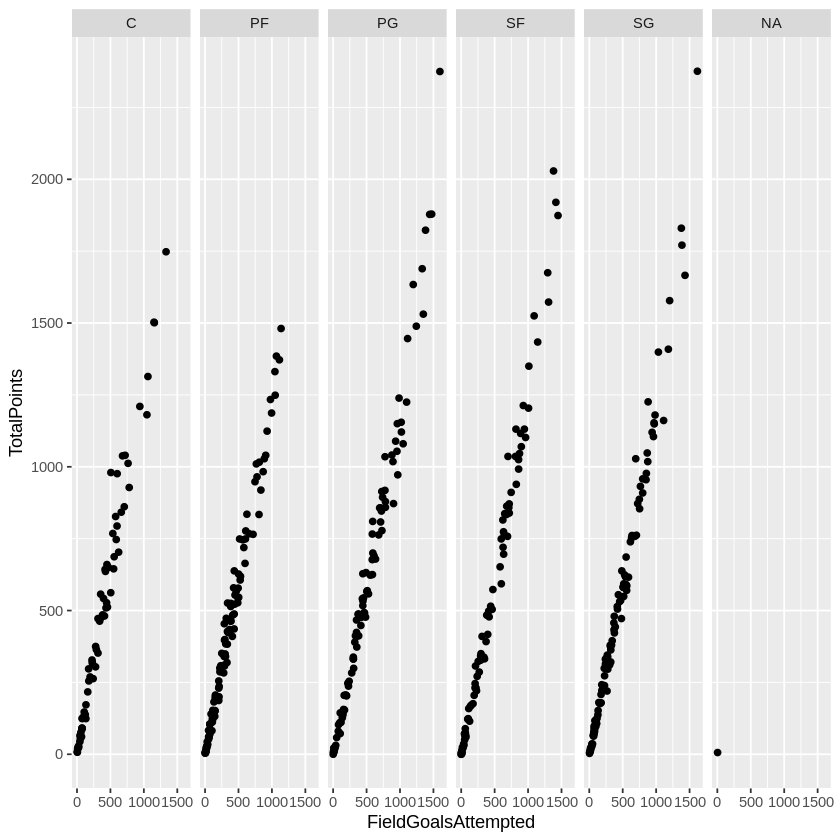

In [16]:
#facets = .~ Position 用守備位置Position分群畫圖(橫向)
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, facets = . ~ Position)

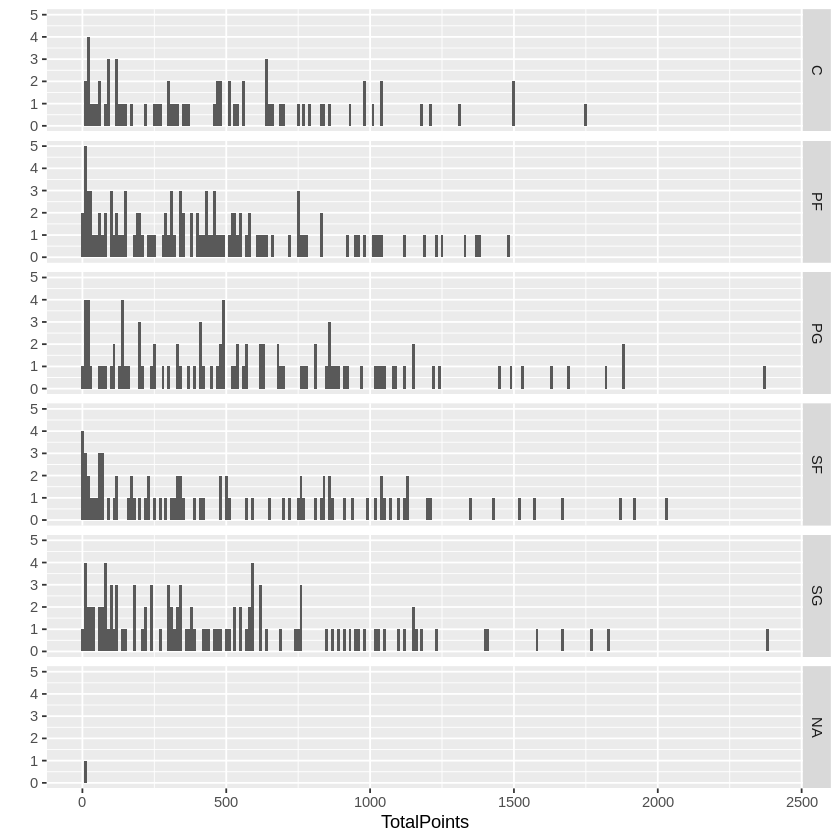

In [19]:
#facets = .~ Position 用守備位置Position分群畫圖(直向)
#binwith = 10 每10分一組
qplot(TotalPoints, data = NBA1516, facets = Position ~ . , binwidth = 10)

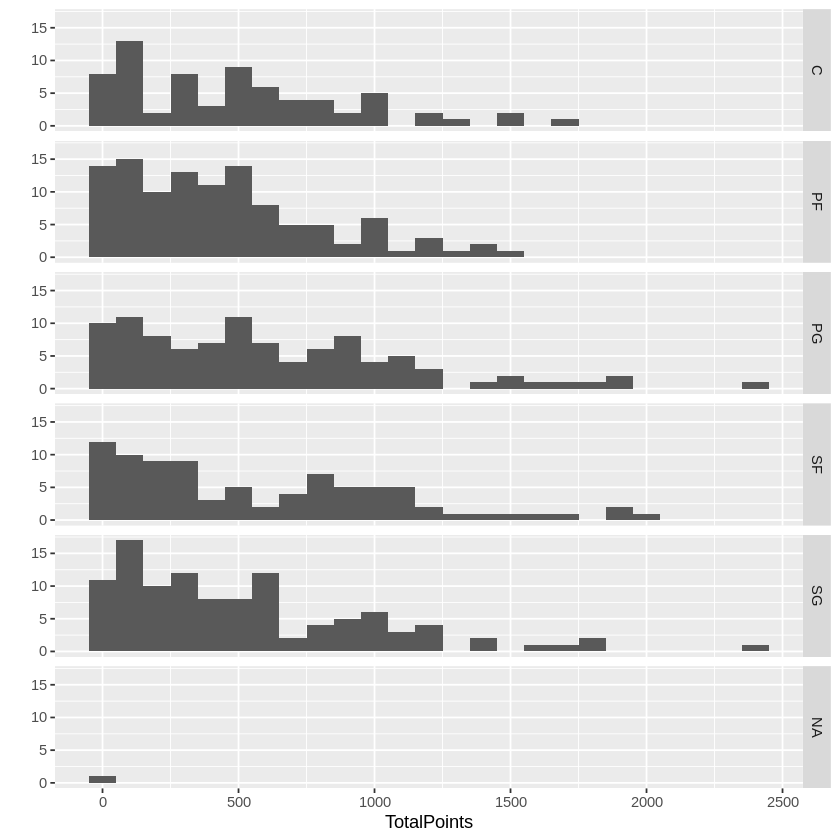

In [18]:
#facets = .~ Position 用守備位置Position分群畫圖(直向)
#binwith = 100 每100分一組
qplot(TotalPoints, data = NBA1516, facets = Position ~ . , binwidth = 100)

In [21]:
library(ggplot2)


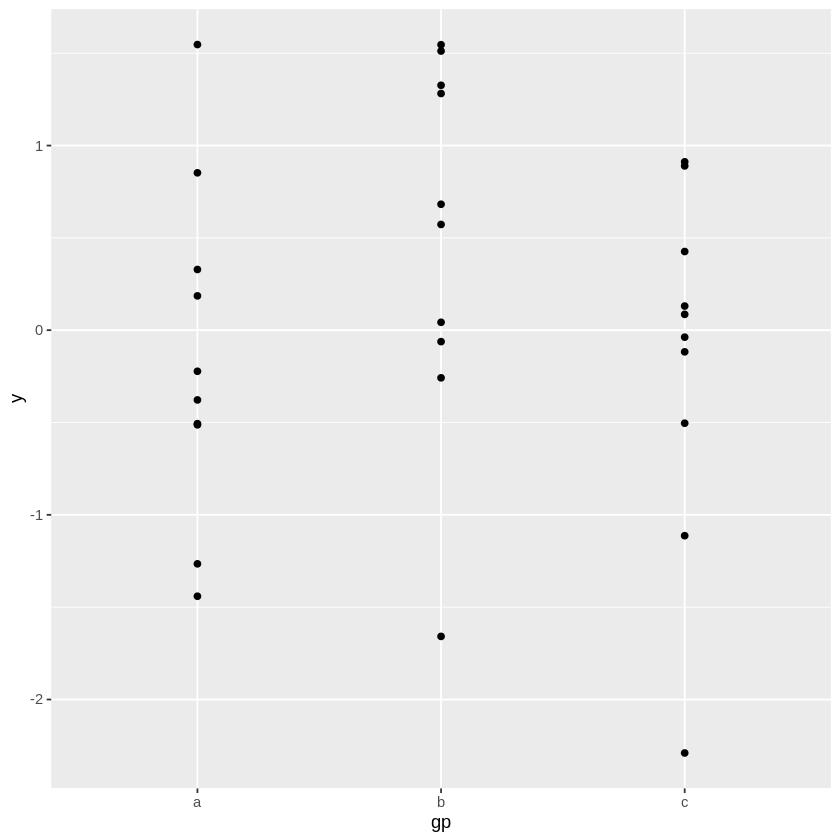

In [24]:
df<-data.frame(gp=factor(rep(letters[1:3], each = 10)),y = rnorm(30))
ggplot(df , aes(x= gp,y=y))+geom_point()

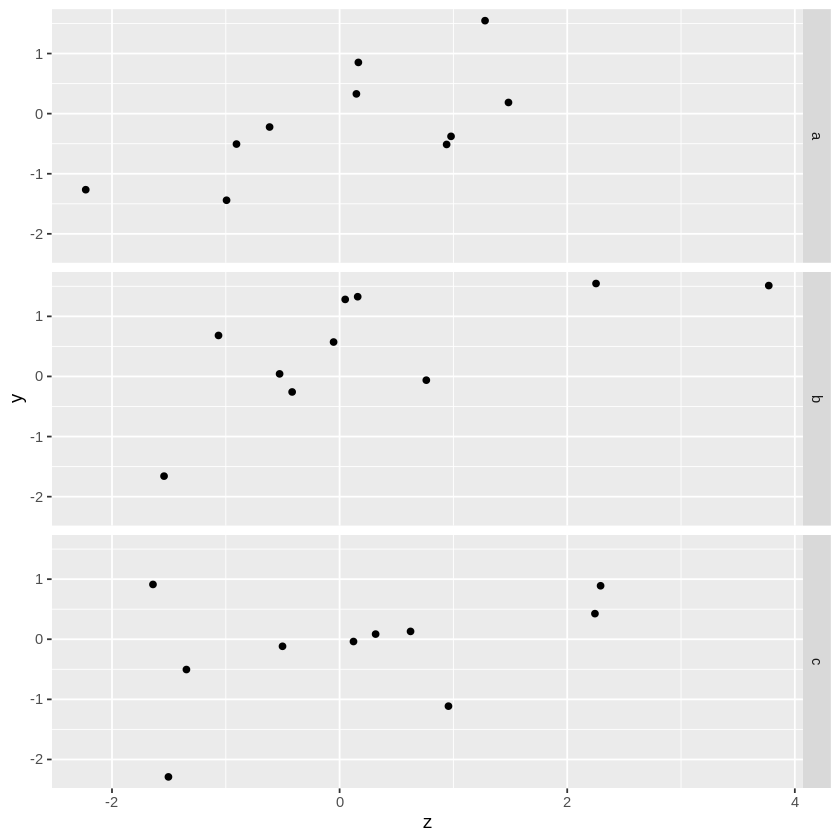

In [27]:
df$z<-df$y+rnorm(30)
ggplot(df, aes(x = z, y =y )) + geom_point() +facet_grid(gp~.)

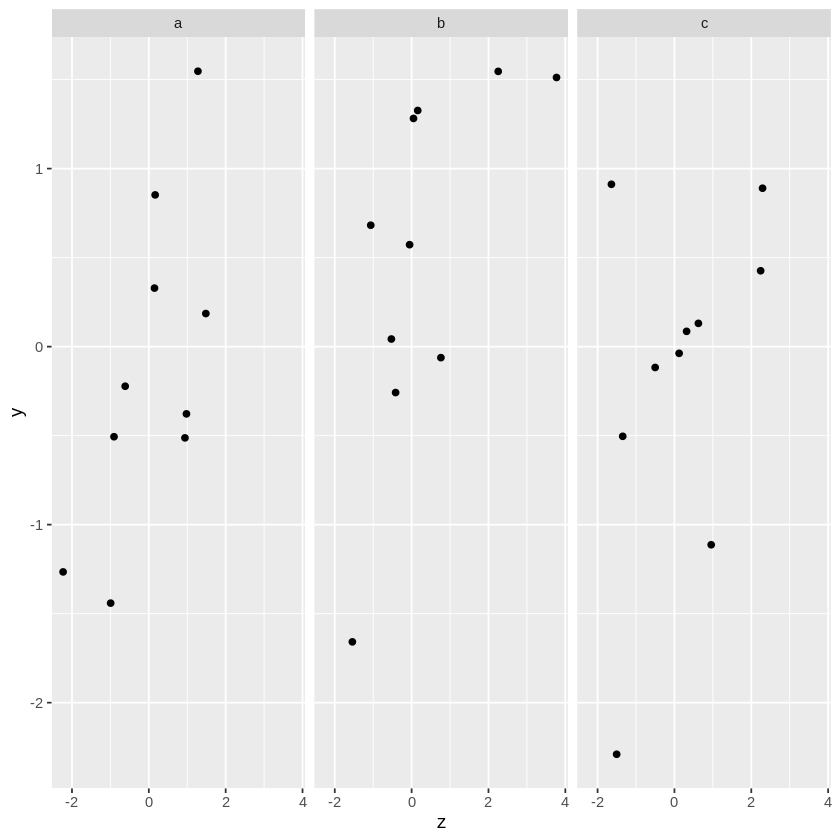

In [28]:
ggplot(df, aes(x = z, y =y ))+geom_point()+facet_grid(.~gp)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



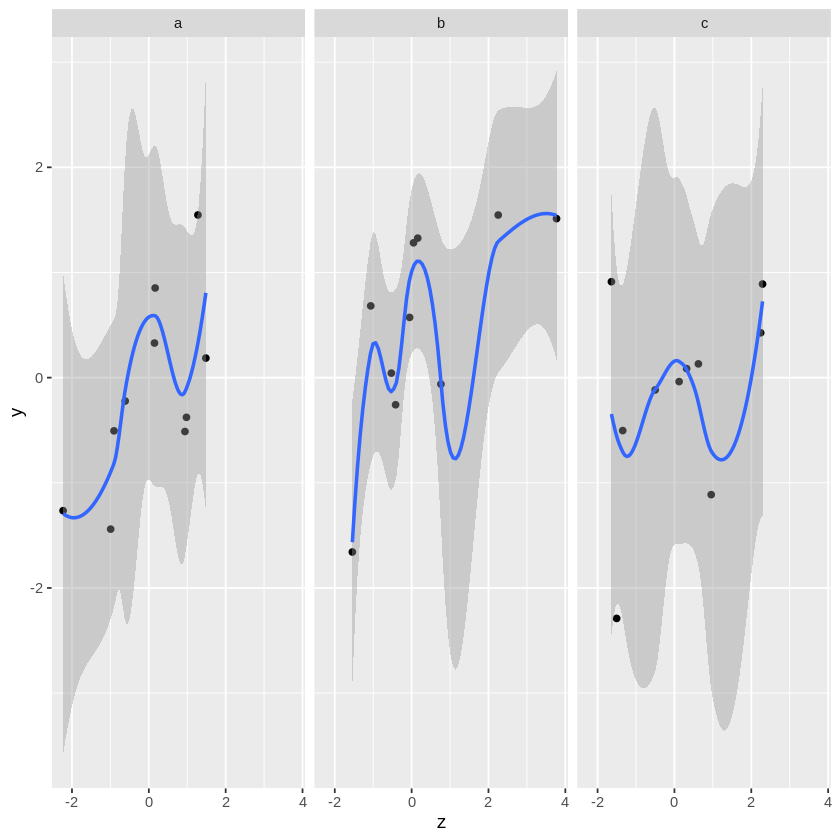

In [30]:
ggplot(df, aes(x = z, y =y ))+geom_point()+facet_grid(.~gp)+geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



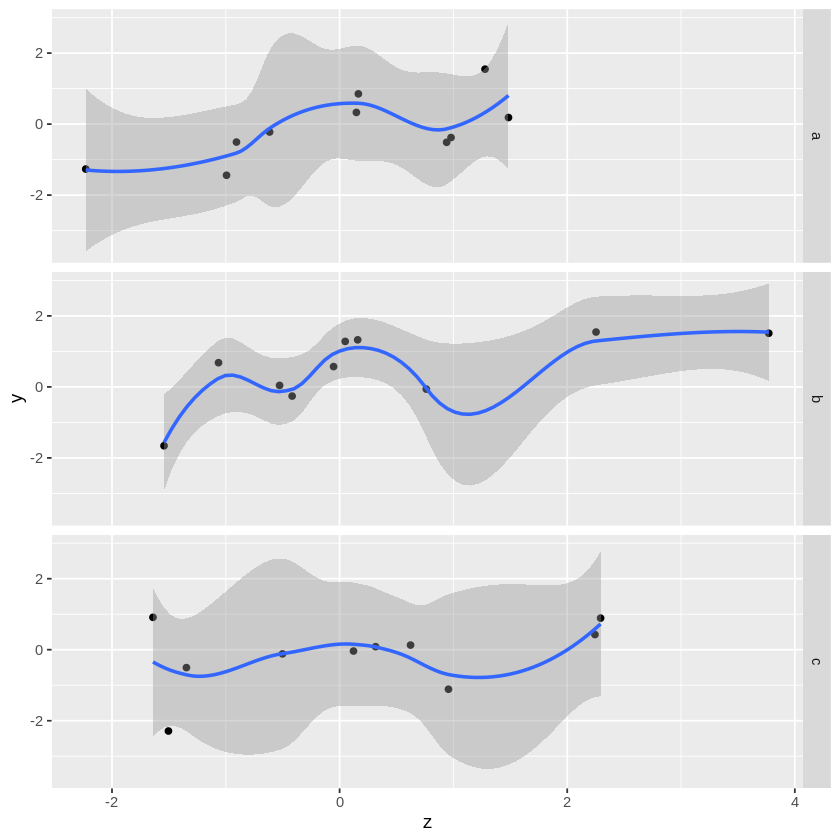

In [31]:
ggplot(df, aes(x = z, y =y )) + geom_point() +facet_grid(gp~.)+geom_smooth()

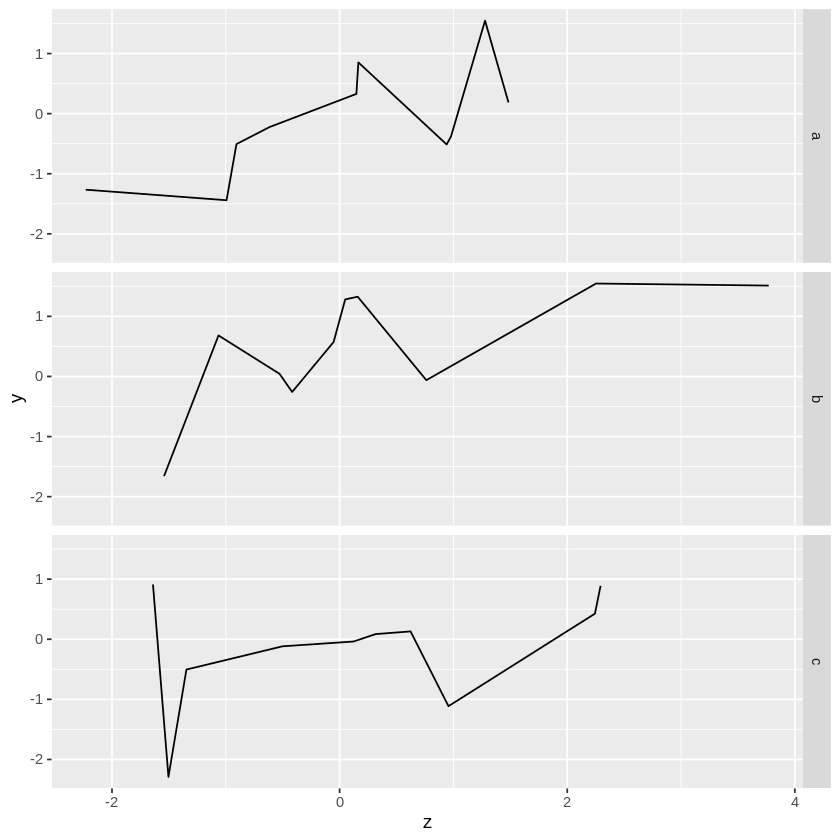

In [32]:
ggplot(df, aes(x = z, y =y )) + geom_line() +facet_grid(gp~.)

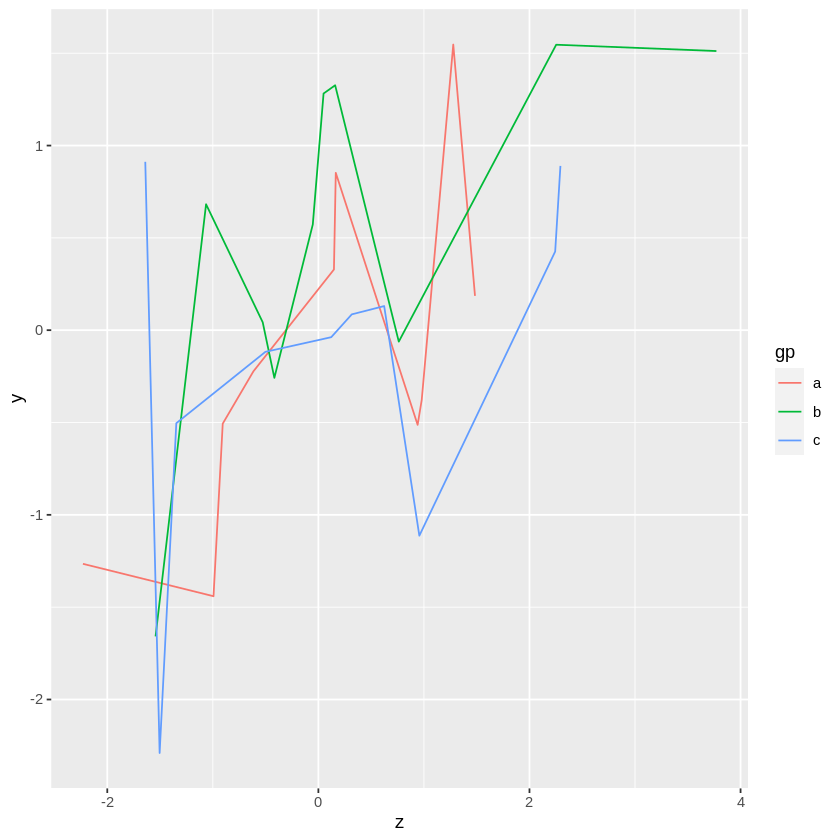

In [34]:
ggplot(df, aes(x = z, y =y , color = gp)) + geom_line() 

In [38]:
install.packages("datasets")
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [39]:
library(datasets)
library(data.table)


In [43]:
airquality$Month<-as.factor(airquality$Month)
airquality.mean<-data.table(airquality)[,.(OzoneMean = mean (Ozone,na.rm = T)),by=Month]

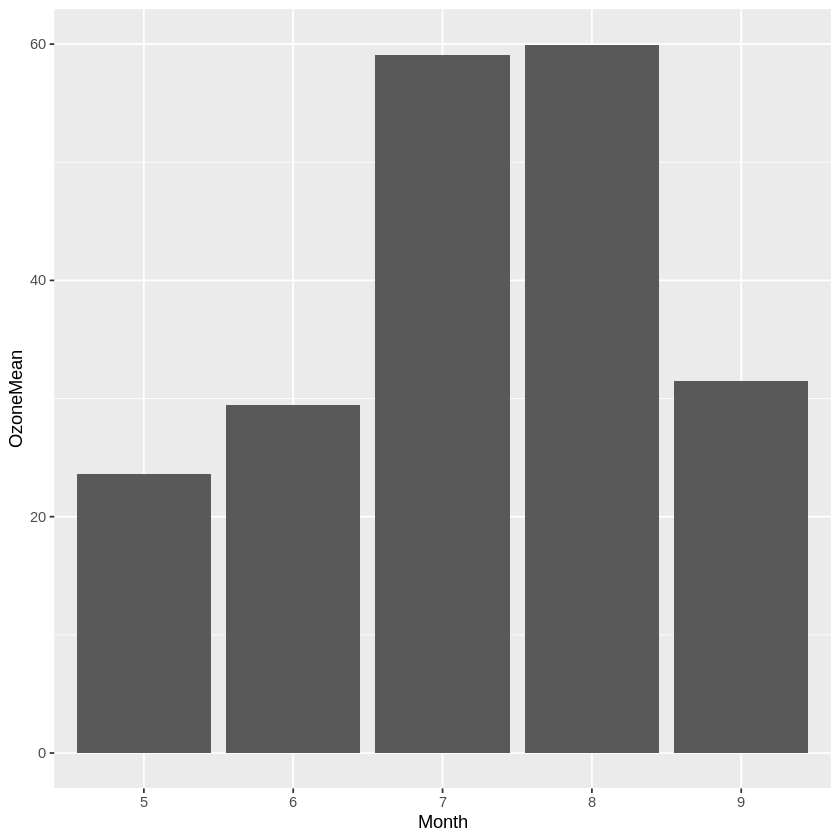

In [44]:
ggplot()+geom_bar(data = airquality.mean, aes(x=Month,y=OzoneMean),stat = "identity")

In [45]:
library(datasets)
library(data.table)

In [48]:
airquality$Month<-as.factor(airquality$Month)
airquality.stat<-data.table(airquality)[,.(OzoneMean = mean (Ozone,na.rm = T),OzoneSD= sd(Ozone,na.rm = T)),by=Month]

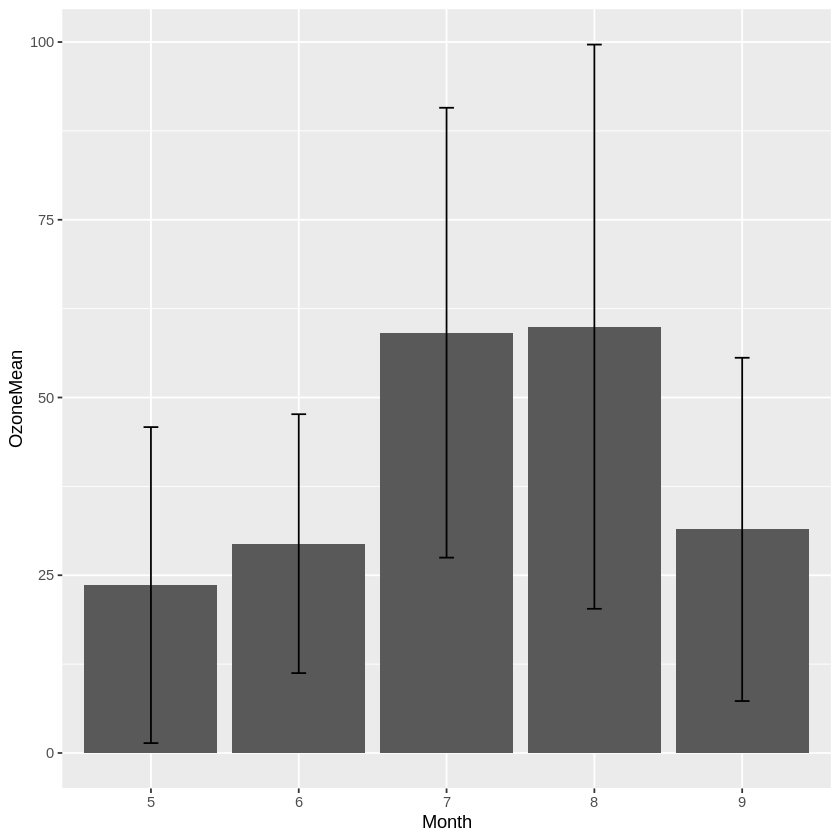

In [49]:
ggplot(data=airquality.stat)+ geom_bar(aes(x=Month , y=OzoneMean), stat= "identity")+ geom_errorbar(aes(x=Month,ymin=OzoneMean-OzoneSD, ymax=OzoneMean+OzoneSD),width=.1)